## Classification of Parkinson patients using tapping and memory

In [1]:
import synapseclient
import pandas as pd
import json
import csv
import matplotlib.pyplot as plt

In [2]:
#Save to a csv file

with open('TappingTableWithPerform.csv') as csvfile:
    TapTable=pd.read_csv(csvfile, delimiter=',') 
with open('DemoTable.csv') as csvfile:
    DemoTable=pd.read_csv(csvfile, delimiter=',') 
with open('MemoryTable.csv') as csvfile:
    MemTable=pd.read_csv(csvfile, delimiter=',')

In [3]:
# eliminate the tasks where parkinson patients were feeling at their best
print(TapTable.shape)
TapTable=TapTable[TapTable['medTimepoint']!= 'Just after Parkinson medication (at your best)']
TapTable=TapTable[TapTable['medTimepoint']!= 'Another time']

MemTable=MemTable[MemTable['medTimepoint']!= 'Just after Parkinson medication (at your best)']
MemTable=MemTable[MemTable['medTimepoint']!= 'Another time']

#TapTable=TapTable.drop(['ROW_ID', 'ROW_VERSION','recordId','createdOn','appVersion','phoneInfo','accel_tapping.json.items','tapping_results.json.ButtonRectLeft','tapping_results.json.ButtonRectRight','tapping_results.json.endDate','tapping_results.json.startDate','tapping_results.json.TappingViewSize','medTimepoint'], axis=1)
print(TapTable.shape)
print(MemTable.shape)

(69993, 17)
(44419, 17)
(3777, 14)


In [4]:
# Averaging results over patients
TapTableN = TapTable.groupby("healthCode")["TapPerform"].mean()
TapTableN = pd.DataFrame(TapTableN)  
TapTableN = TapTableN.reset_index()
print(TapTableN.head())


                             healthCode  TapPerform
0  000240d1-1110-4dd2-a2d0-e344c37efd68       210.0
1  0002d5ff-53da-44bb-ab0d-f2426a8c78e2       104.0
2  0005a31d-e52c-447c-9971-ccc7bef667fb       180.0
3  00081bd9-9abd-4003-b035-de6cc3e8c922        38.5
4  00290381-e82e-46b2-b4e6-df115823d71b       193.0


In [5]:
MemTable.columns
MemTable=MemTable.drop(['ROW_ID', 'ROW_VERSION','recordId','createdOn','appVersion','phoneInfo','MemoryGameResults.json.startDate','MemoryGameResults.json.endDate','MemoryGameResults.json.MemoryGameGameRecords','medTimepoint'], axis=1)
MemTableN = MemTable.groupby("healthCode")["MemoryGameResults.json.MemoryGameOverallScore"].mean()
MemTableN = pd.DataFrame(MemTableN)  
MemTableN = MemTableN.reset_index()
print(MemTableN.head())


                             healthCode  \
0  00081bd9-9abd-4003-b035-de6cc3e8c922   
1  010aed99-c9b3-4bdc-a23b-530d619b43a9   
2  01185d64-7791-4282-8c3d-e657cd810bb0   
3  0142010e-cb15-4391-90b5-29ac0dbe5bae   
4  0160664a-f4af-4071-a4aa-2967f3ea0503   

   MemoryGameResults.json.MemoryGameOverallScore  
0                                         210.00  
1                                         255.00  
2                                         215.00  
3                                         257.50  
4                                         251.25  


In [6]:
print(MemTableN.shape)

(823, 2)


In [7]:

#Sub-DataFrame of Demo Table with only features of interest: Age, diagnostic year, gender.
#DemoTable.head()
DemoTableN=DemoTable[["age","healthCode","diagnosis-year","gender"]]
DemoTableN.shape
#Merges TapTables with the PerfInfo and drops thos values in TapTable that are not defined in PerInfo
TapTableN=TapTableN.merge(DemoTableN)
TapTableN.shape
#TapMemTableN=pd.concat([TapTableN, MemTableN], axis=1)
#TapMemTableN
#TapMemTableN.head()
#TapTable.head()
#PatientTemp = TapTable.groupby("healthCode")["healthCode"].count()
#print(PatientTemp)
#TapMemTableN=TapMemTableN.merge(DemoTableN)
#TapMemTableN.head()


(6013, 5)

In [8]:
TapMemTableN=TapTableN.merge(MemTableN)
print(TapMemTableN)

                               healthCode  TapPerform   age  diagnosis-year  \
0    00081bd9-9abd-4003-b035-de6cc3e8c922   38.500000  70.0             NaN   
1    010aed99-c9b3-4bdc-a23b-530d619b43a9  201.500000  46.0             NaN   
2    0142010e-cb15-4391-90b5-29ac0dbe5bae  200.000000  37.0             NaN   
3    0160664a-f4af-4071-a4aa-2967f3ea0503  136.896552  64.0          2012.0   
4    01b25cac-97dc-4f16-b266-742a25a768d0   79.357143  67.0             NaN   
..                                    ...         ...   ...             ...   
641  ff5abff8-7ece-4735-b568-4f4d361f1841  240.500000  36.0             NaN   
642  ff699dbc-26d4-4dae-8c34-d0fb7b96ae21  141.000000  41.0             NaN   
643  ff776fbd-45ad-491b-ba6d-67a74f62c434  162.000000  18.0             NaN   
644  ffab2631-dfe1-4f5e-bd9e-f763e8aede19  185.643678  56.0          2009.0   
645  ffe9fec0-e3c6-44b2-8b4f-8f6f772b99c3  166.000000  61.0          2010.0   

     gender  MemoryGameResults.json.MemoryGameOvera

In [9]:
TapMemTableN=TapMemTableN.dropna(subset=['age','gender','MemoryGameResults.json.MemoryGameOverallScore'])

In [10]:
# change gender column to categorical 0:female, 1: male
df_gender = pd.get_dummies(TapMemTableN['gender'],drop_first=True)
#print(TapTableN.gender.value_counts())
TapMemTableN = pd.concat([TapMemTableN, df_gender], axis=1)
TapMemTableN=TapMemTableN.drop(['healthCode','gender'], axis=1)



In [11]:
TapMemTableN.head()


,TapPerform,age,diagnosis-year,MemoryGameResults.json.MemoryGameOverallScore,Male
0,38.500000,70.0,NaN,210.0000,1
1,201.500000,46.0,NaN,255.0000,1
2,200.000000,37.0,NaN,257.5000,1
3,136.896552,64.0,2012.0,251.2500,1
4,79.357143,67.0,NaN,237.1875,1


In [12]:
# diagnosis-year becomes years with diagnosed disease
TapMemTableN['diagnosis-year']=(2015-TapMemTableN['diagnosis-year'])
#NAN REPLACED WITH ZERO AND OTHER INT REPLACED WITH ONE
dfb = TapMemTableN['diagnosis-year'].notnull().astype(int)
TapMemTableN['YearsPD']=dfb
print(TapMemTableN)


     TapPerform   age  diagnosis-year  \
0     38.500000  70.0             NaN   
1    201.500000  46.0             NaN   
2    200.000000  37.0             NaN   
3    136.896552  64.0             3.0   
4     79.357143  67.0             NaN   
..          ...   ...             ...   
641  240.500000  36.0             NaN   
642  141.000000  41.0             NaN   
643  162.000000  18.0             NaN   
644  185.643678  56.0             6.0   
645  166.000000  61.0             5.0   

     MemoryGameResults.json.MemoryGameOverallScore  Male  YearsPD  
0                                       210.000000     1        0  
1                                       255.000000     1        0  
2                                       257.500000     1        0  
3                                       251.250000     1        1  
4                                       237.187500     1        0  
..                                             ...   ...      ...  
641                            

In [13]:
TapMemTableN.columns

Index(['TapPerform', 'age', 'diagnosis-year',
       'MemoryGameResults.json.MemoryGameOverallScore', 'Male', 'YearsPD'],
      dtype='object')

In [14]:
X = TapMemTableN[['TapPerform', 'age','Male','MemoryGameResults.json.MemoryGameOverallScore']]
y = TapMemTableN['YearsPD']
sum(y)

173

(array([  0., 100., 200., 300., 400., 500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

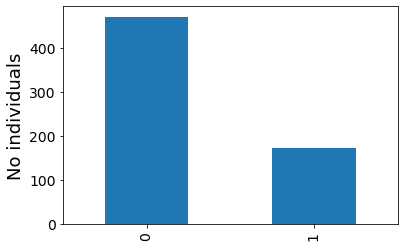

In [15]:
PDPlot=y.value_counts().plot.bar()
PDPlot.set_ylabel('No individuals',fontsize=18)
#PDPlot.set_title('Audit Results')
PDPlot.set_xticklabels( ('0', '1'),fontsize=14 )
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

## Building the model

In [16]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [18]:
classifiers = [LogisticRegression(random_state=13), 
               GaussianNB(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(random_state=13),
               RandomForestClassifier(random_state=13)]


# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

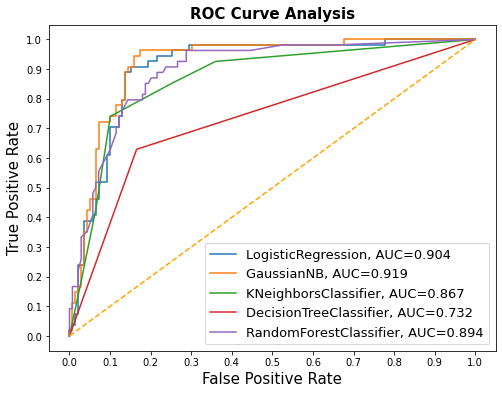

In [19]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [20]:
#Notes on the Report:
#Precision 0: TN/(TN+FN) of those predicted with out the disease, which how many really do not have it.
#Precision 1: TP/(TP+FP) of those predicted with the disease, which how many really had it.
#Recall 0: TN/(TN+FP) of those that dont have the disease how many were predicted with out the disease
#Recall 1: TP/(TP+FN) of those that have the disease how many were predicted with the disease
#Accuracy: TP+TN/(TP+TN+FP+FN), how many were classified correctly.
#For early diagnosis we would like to focus on recall 1 to be high. People with early stages of the disease should diagnose
#Few false negatives.

## Using weighted logistic regression to compensate for imbalance data set


In [21]:
# define weight hyperparameter
w = [{0:1,1:1},{0:1,1:2},{0:1,1:3}, {0:1,1:4}, 
     {0:1,1:5}, {0:1,1:6}, {0:1,1:7}, {0:1,1:8}, 
     {0:1,1:9}, {0:1,1:10}, {0:1,1:12}, {0:1,1:14}, 
     {0:1,1:16}, {0:1,1:18}, {0:1,1:20}, 
     {0:1,1:25}, {0:1,1:30}, {0:1.0,1:40}, 
     {0:1.0,1:50}, {0:1,1:100}]
hyperparam_grid = {"class_weight": w }

from sklearn import datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

# define model
lg3 = LogisticRegression(random_state=13)
# define evaluation procedure
grid = GridSearchCV(lg3,hyperparam_grid,scoring="roc_auc", cv=None, n_jobs=-1, refit=True)
grid.fit(X_train,y_train)


print(f'Best score: {grid.best_score_} with param: {grid.best_params_}')

print(grid.cv_results_['mean_test_score'])

Best score: 0.9076539240556112 with param: {'class_weight': {0: 1, 1: 1}}
[0.90765392 0.90638073 0.90625094 0.90536006 0.90485501 0.90510753
 0.90485501 0.90434643 0.90345907 0.90345907 0.90332576 0.90307676
 0.90244545 0.90168787 0.90080403 0.89878031 0.89739142 0.89563079
 0.895252   0.89033833]


Accuracy of logistic regression classifier on test set: 0.85
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       139
           1       0.70      0.80      0.75        54

    accuracy                           0.85       193
   macro avg       0.81      0.83      0.82       193
weighted avg       0.86      0.85      0.85       193



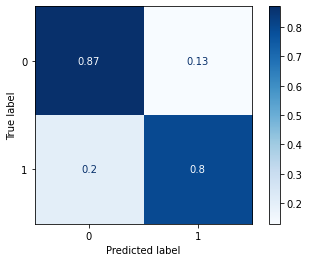

In [22]:

from sklearn.metrics import roc_curve, roc_auc_score

### define class weights grdisearch showed this is the best weighted class

w = {0: 1.0, 1:1} #obtein from last cell

classTapMem = LogisticRegression(class_weight=w)
classTapMem.fit(X_train, y_train) 

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

y_pred = classTapMem.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(classTapMem.score(X_test, y_test)))
confusionMatrix = confusion_matrix(y_test, y_pred, normalize='true')
print(classification_report(y_test, y_pred))
classes = ["unoccupied", "occupied"]
disp = plot_confusion_matrix(classTapMem, X_test, y_test,cmap=plt.cm.Blues,normalize='true')

In [26]:
#'TapPerform', 'age','Male','MemoryGameResults.json.MemoryGameOverallScore'
print(classTapMem.coef_,classTapMem.intercept_)

[[-0.01061271  0.109779   -0.44248493  0.00141366]] [-4.97624339]


Best predictor is gender!

<AxesSubplot:xlabel='Male', ylabel='age'>

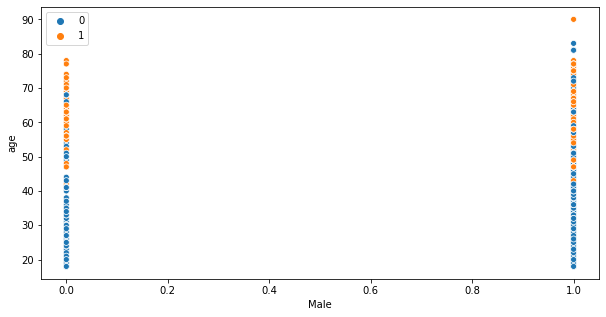

In [29]:
# scatter plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.scatterplot(data = TapMemTableN, 
                x = 'Male', 
                y = 'age', 
                hue = TapMemTableN['YearsPD'].tolist())

## Using only TapPerformance